🧪 Mini-projet : Prédire le type de vin à partir de ses propriétés chimiques (Wine dataset)

l'objectif ici est de creer une pipeline de classifiction pour predire la classifiquation du vin a partir de ces 13 propriété chimiques

In [10]:
from sklearn.datasets import load_wine
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


je vais essayer de tester different algrotihme pour voir lequel pourras produire un modele performant 

sample of the dataset :


In [11]:
ds = load_wine()
df = pd.DataFrame(ds.data, columns= ds.feature_names )
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
df.corr()
##les donnes ne sont pas trop correlee entr elles

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


on va creer la pipeline ou on va scaler les atributes avec les quantiles et puis je vais ajouter les modeles ave les parametres

In [13]:
X, y = ds['data'], ds['target']
Xtrain, Xtest, ytrain , ytest =train_test_split(X, y ,test_size= 0.3, random_state=42)
pcacomponent = 3
pca = PCA(n_components= pcacomponent)

pipe =  Pipeline(
    [('scale', QuantileTransformer()),
     ('model', RandomForestClassifier())]
)
#pipeline de base
#je fais le paramdgrid
paragrid= [
    {"model": [RandomForestClassifier(random_state=42)],
    "scale": [StandardScaler()],
    "model__n_estimators": [10,20,30,50,60,70,100,150] },

    {"model": [RandomForestClassifier(random_state=42)],
    "scale": [QuantileTransformer()],
    "model__n_estimators": [10,20,30,50,60,70,100,150] },

    {"model": [GradientBoostingClassifier(random_state=42)],
    "scale": [QuantileTransformer()],
    "model__n_estimators": [10,20,30,50,60,70,100,150] },
    {"model": [KNeighborsClassifier()],
    "scale": [QuantileTransformer()],
    "model__n_neighbors": [10,20,30] },
    {"scale": [QuantileTransformer()],
     "model": [MLPClassifier(random_state=42)],
    
    "model__hidden_layer_sizes": [(3,),(10,),(15,),(25,),(50)] }
]


In [14]:
modsearch= GridSearchCV(
    pipe,
    param_grid= paragrid,
    cv=8,
    n_jobs=-1 
)
modsearch.fit(Xtrain, ytrain)

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scale', QuantileTransformer()),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestClassifier(random_state=42)],
                          'model__n_estimators': [10, 20, 30, 50, 60, 70, 100,
                                                  150],
                          'scale': [StandardScaler()]},
                         {'model': [RandomForestClassifier(random_state=42)],
                          'model__n_estimators': [10, 20, 30, 50,...
                         {'model': [GradientBoostingClassifier(random_state=42)],
                          'model__n_estimators': [10, 20, 30, 50, 60, 70, 100,
                                                  150],
                          'scale': [QuantileTransformer()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [10, 20, 30],
                          'scale': [QuantileTransformer()]},
                         {'model': [MLPClassifier(random_state=42)],
                          'model__hidden_layer_sizes': [(3,), (10,), (15,),
                                                        (25,), 50],
                          'scale': [QuantileTransformer()]}])

In [15]:
dfresult= pd.DataFrame(modsearch.cv_results_)
print(modsearch.best_estimator_)
dfresult

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=10, random_state=42))])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__n_estimators,param_scale,param_model__n_neighbors,param_model__hidden_layer_sizes,params,...,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012464,0.000660,0.001067,0.000531,RandomForestClassifier(random_state=42),10.0,StandardScaler(),NaN,NaN,{'model': RandomForestClassifier(random_state=...,...,1.0000,0.9375,0.9375,0.933333,1.000000,1.000000,1.000000,0.976042,0.030953,1
1,0.024466,0.005321,0.002030,0.000512,RandomForestClassifier(random_state=42),20.0,StandardScaler(),NaN,NaN,{'model': RandomForestClassifier(random_state=...,...,1.0000,0.9375,0.8750,1.000000,0.933333,1.000000,1.000000,0.968229,0.044582,3
2,0.035184,0.003368,0.002378,0.000698,RandomForestClassifier(random_state=42),30.0,StandardScaler(),NaN,NaN,{'model': RandomForestClassifier(random_state=...,...,1.0000,0.9375,0.8750,1.000000,0.933333,1.000000,1.000000,0.968229,0.044582,3
3,0.054964,0.004863,0.003714,0.001913,RandomForestClassifier(random_state=42),50.0,StandardScaler(),NaN,NaN,{'model': RandomForestClassifier(random_state=...,...,1.0000,0.9375,0.8750,1.000000,0.933333,1.000000,1.000000,0.968229,0.044582,3
4,0.062532,0.001806,0.003684,0.000903,RandomForestClassifier(random_state=42),60.0,StandardScaler(),NaN,NaN,{'model': RandomForestClassifier(random_state=...,...,1.0000,0.9375,0.8750,1.000000,0.933333,1.000000,1.000000,0.968229,0.044582,3
5,0.079327,0.009064,0.005011,0.001428,RandomForestClassifier(random_state=42),70.0,StandardScaler(),NaN,NaN,{'model': RandomForestClassifier(random_state=...,...,1.0000,0.9375,0.8750,1.000000,0.933333,1.000000,1.000000,0.968229,0.044582,3
6,0.118248,0.008865,0.006941,0.002485,RandomForestClassifier(random_state=42),100.0,StandardScaler(),NaN,NaN,{'model': RandomForestClassifier(random_state=...,...,1.0000,0.9375,0.8750,1.000000,0.933333,1.000000,1.000000,0.968229,0.044582,3
7,0.160118,0.012143,0.007656,0.001493,RandomForestClassifier(random_state=42),150.0,StandardScaler(),NaN,NaN,{'model': RandomForestClassifier(random_state=...,...,1.0000,0.9375,0.8750,1.000000,0.933333,1.000000,1.000000,0.968229,0.044582,3
8,0.014052,0.001277,0.002007,0.001003,RandomForestClassifier(random_state=42),10.0,QuantileTransformer(),NaN,NaN,{'model': RandomForestClassifier(random_state=...,...,1.0000,0.9375,0.9375,0.933333,0.933333,1.000000,1.000000,0.967708,0.032325,17
9,0.024886,0.001044,0.002268,0.000451,RandomForestClassifier(random_state=42),20.0,QuantileTransformer(),NaN,NaN,{'model': RandomForestClassifier(random_state=...,...,1.0000,0.9375,0.8750,1.000000,0.933333,1.000000,1.000000,0.968229,0.044582,3


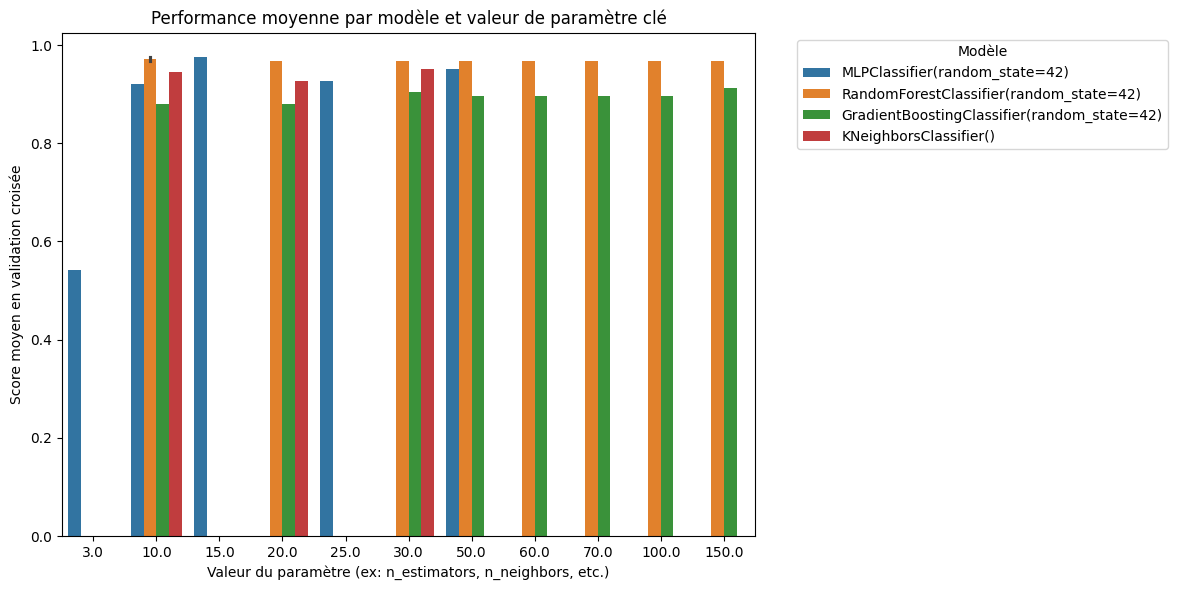

In [16]:
# plotter les resultat 
# Convertir param_model en string pour l'affichage
dfresult['model_name'] = dfresult['param_model'].astype(str)

# Créer une figure
plt.figure(figsize=(12, 6))

# Créer une colonne 'param_value' selon le modèle
def get_param_value(row):
    if 'RandomForest' in row['model_name']:
        return row.get('param_model__n_estimators', None)
    elif 'GradientBoosting' in row['model_name']:
        return row.get('param_model__n_estimators', None)
    elif 'KNeighbors' in row['model_name']:
        return row.get('param_model__n_neighbors', None)
    elif 'MLPClassifier' in row['model_name']:
        return row.get('param_model__hidden_layer_sizes', None)
    else:
        return None

dfresult['param_value'] = dfresult.apply(get_param_value, axis=1)

# Nettoyage des valeurs de type tuple pour affichage
dfresult['param_value'] = dfresult['param_value'].apply(lambda x: x if not isinstance(x, tuple) else x[0])

# Supprimer les lignes sans param_value (ex : si vide)
df_filtered = dfresult.dropna(subset=['param_value'])

# Tracer l'histogramme groupé
sns.barplot(
    data=df_filtered,
    x='param_value',
    y='mean_test_score',
    hue='model_name'
)

plt.title('Performance moyenne par modèle et valeur de paramètre clé')
plt.xlabel('Valeur du paramètre (ex: n_estimators, n_neighbors, etc.)')
plt.ylabel('Score moyen en validation croisée')
plt.legend(title='Modèle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
ypredicted= modsearch.predict(Xtest)
print(accuracy_score(y_true=ytest, y_pred= ypredicted))
print(confusion_matrix(y_true=ytest, y_pred= ypredicted))

0.9259259259259259
[[19  0  0]
 [ 2 18  1]
 [ 0  1 13]]
